# 2. EDA

In [171]:
import io
import os
import json
import pandas as pd
import numpy as np
import random
import distutils.dir_util
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from collections import Counter
import string

fe = fm.FontEntry(
    fname=r'./font/NanumGothic.ttf', name='NanumGothic')                       
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) 

In [38]:
playlists = pd.read_json('../0_data/playlists.json', typ = 'frame', encoding='utf-8')
song_meta = pd.read_json('../0_data/song_meta.json', typ = 'frame', encoding='utf-8') 
genre_gn_all = pd.read_json('../0_data/genre_gn_all.json', typ = 'frame', encoding='utf-8', orient='index')

## 1) Song Meta & Genre

> Genre

- 대분류 장르, 세부 장르 비교

In [39]:
# genre_gn_all 확인
genre_gn_all.head()

,0
GN0100,발라드
GN0101,세부장르전체
GN0102,'80
GN0103,'90
GN0104,'00


In [40]:
# genre_gn_all의 컬럼 네임 지정

genre_gn_all = genre_gn_all.reset_index().rename(columns={'index':'gnr_code', 0:'gnr_name'})
genre_gn_all.head()

,gnr_code,gnr_name
0,GN0100,발라드
1,GN0101,세부장르전체
2,GN0102,'80
3,GN0103,'90
4,GN0104,'00


In [41]:
# 대분류 장르코드들만 뽑기
gnr_code = genre_gn_all[genre_gn_all['gnr_code'].str[-2:]=='00']

# 소분류 장르코드만 뽑기
dtl_gnr_code = genre_gn_all[genre_gn_all['gnr_code'].str[-2:] != '00']
dtl_gnr_code.rename(columns = {'gnr_code' : 'dtl_gnr_code', 'gnr_name' : 'dtl_gnr_name'}, inplace = True)

# 대분류 장르코드와 소분류 장르코드 각각의 앞자리 네자리 공통코드 추출
gnr_code = gnr_code.assign(join_code = gnr_code['gnr_code'].str[0:4])
dtl_gnr_code = dtl_gnr_code.assign(join_code = dtl_gnr_code['dtl_gnr_code'].str[0:4])

# join_code(네자리 공통코드) 기준으로 Merge
gnr_code_tree = pd.merge(gnr_code, dtl_gnr_code, how = 'left', on = 'join_code')

gnr_code_tree[['gnr_code', 'gnr_name', 'dtl_gnr_code', 'dtl_gnr_name']]
gnr_code_tree

C:\Users\cg063\AppData\Local\Temp\ipykernel_8260\906477822.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtl_gnr_code.rename(columns = {'gnr_code' : 'dtl_gnr_code', 'gnr_name' : 'dtl_gnr_name'}, inplace = True)


,gnr_code,gnr_name,join_code,dtl_gnr_code,dtl_gnr_name
0,GN0100,발라드,GN01,GN0101,세부장르전체
1,GN0100,발라드,GN01,GN0102,'80
2,GN0100,발라드,GN01,GN0103,'90
3,GN0100,발라드,GN01,GN0104,'00
4,GN0100,발라드,GN01,GN0105,'10-
...,...,...,...,...,...
220,GN2800,뮤직테라피,GN28,GN2806,반려동물
221,GN2900,뮤지컬,GN29,GN2901,세부장르전체
222,GN2900,뮤지컬,GN29,GN2902,국내뮤지컬
223,GN2900,뮤지컬,GN29,GN2903,국외뮤지컬


In [135]:
# 대분류 장르에는 어떤 소분류 장르가 있는지 확인
gnr_code_tree.groupby('gnr_name')['dtl_gnr_name'].apply(list).reset_index()

,gnr_name,dtl_gnr_name
0,CCM,"[세부장르전체, 국내CCM, 국외CCM, 워십, 찬송가, 성가, 연주곡, 어린이, ..."
1,EDM,"[세부장르전체, 하우스, 클럽, DJ]"
2,J-POP,"[세부장르전체, POP, 록, 일렉트로니카, 랩/힙합, R&B/Soul, 시부야케이..."
3,OST,"[세부장르전체, 국내영화, 국외영화, 국내드라마, 국외드라마, 애니메이션/게임, 국..."
4,POP,"[세부장르전체, 얼터너티브팝, 올디스, 월드팝, '60-'70, '80-'90, '..."
5,R&B/Soul,"[세부장르전체, 어반, R&B, 세부장르전체, 컨템포러리 R&B, 소울, 어반, '..."
6,국악,"[세부장르전체, 크로스오버, 국악가요, 민요, 판소리/단가, 풍물/사물놀이]"
7,뉴에이지,"[세부장르전체, 이지리스닝, J-Newage, 기능성음악, 기타, 피아노, 컴필레이션]"
8,댄스,"[세부장르전체, '80, '90, '00, '10-]"
9,랩/힙합,"[세부장르전체, 랩 스타일, 보컬 스타일, 언더그라운드 힙합, 시대별, 세부장르전체..."


-> 대분류 코드 중 일부 중복 :R&B/Soul(GN0400, GN1300), 록/메탈(GN0600, GN1000)  
-> 대분류 코드 중 크리스마스(GN3000)는 소분류 코드 X

> Song Meta 

- 오류 날짜 확인

C:\Users\cg063\AppData\Local\Temp\ipykernel_8260\1253507143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_issue_date['issue_date'] = song_issue_date['issue_date'].astype(str)
C:\Users\cg063\AppData\Local\Temp\ipykernel_8260\1253507143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_issue_date['issue_year'] = song_issue_date['issue_date'].str[0:4]
C:\Users\cg063\AppData\Local\Temp\ipykernel_8260\1253507143.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

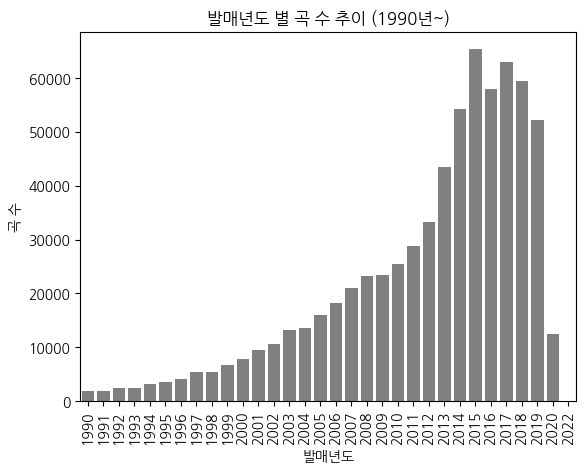

In [49]:
# 1. 곡 아이디(id)와 발매일자(issue_date) 추출
song_issue_date = song_meta[['id', 'issue_date']]
song_issue_date['issue_date'] = song_issue_date['issue_date'].astype(str)

# 2. issue_date의 앞자리 네 자리를 추출하여 발매년도(issue_year) 변수 생성
song_issue_date['issue_year'] = song_issue_date['issue_date'].str[0:4]
song_issue_date.rename(columns = {'id' : 'song_id'}, inplace = True)
song_issue_date['song_id'] = song_issue_date['song_id'].astype(str)

# 3. 1990년도~ 필터링
song_issue_date_filter = song_issue_date[song_issue_date.issue_year >= '1990']

# 4. 발매년도 별 곡 수 count 테이블 생성 : issue_year_song_cnt
issue_year_song_cnt = song_issue_date_filter.groupby('issue_year').song_id.nunique().reset_index(name = 'song_cnt')

# 5. plotting
issue_year_song_cnt_plot = sns.barplot(x = 'issue_year', y = 'song_cnt', data = issue_year_song_cnt, color = 'grey')
issue_year_song_cnt_plot.set_title('발매년도 별 곡 수 추이 (1990년~)')
issue_year_song_cnt_plot.set_xlabel('발매년도')
issue_year_song_cnt_plot.set_ylabel('곡 수')
plt.xticks(rotation = 90)
plt.show()

=> 오류 날짜 수정해야 함

- 노래 별 장르 분포 화인

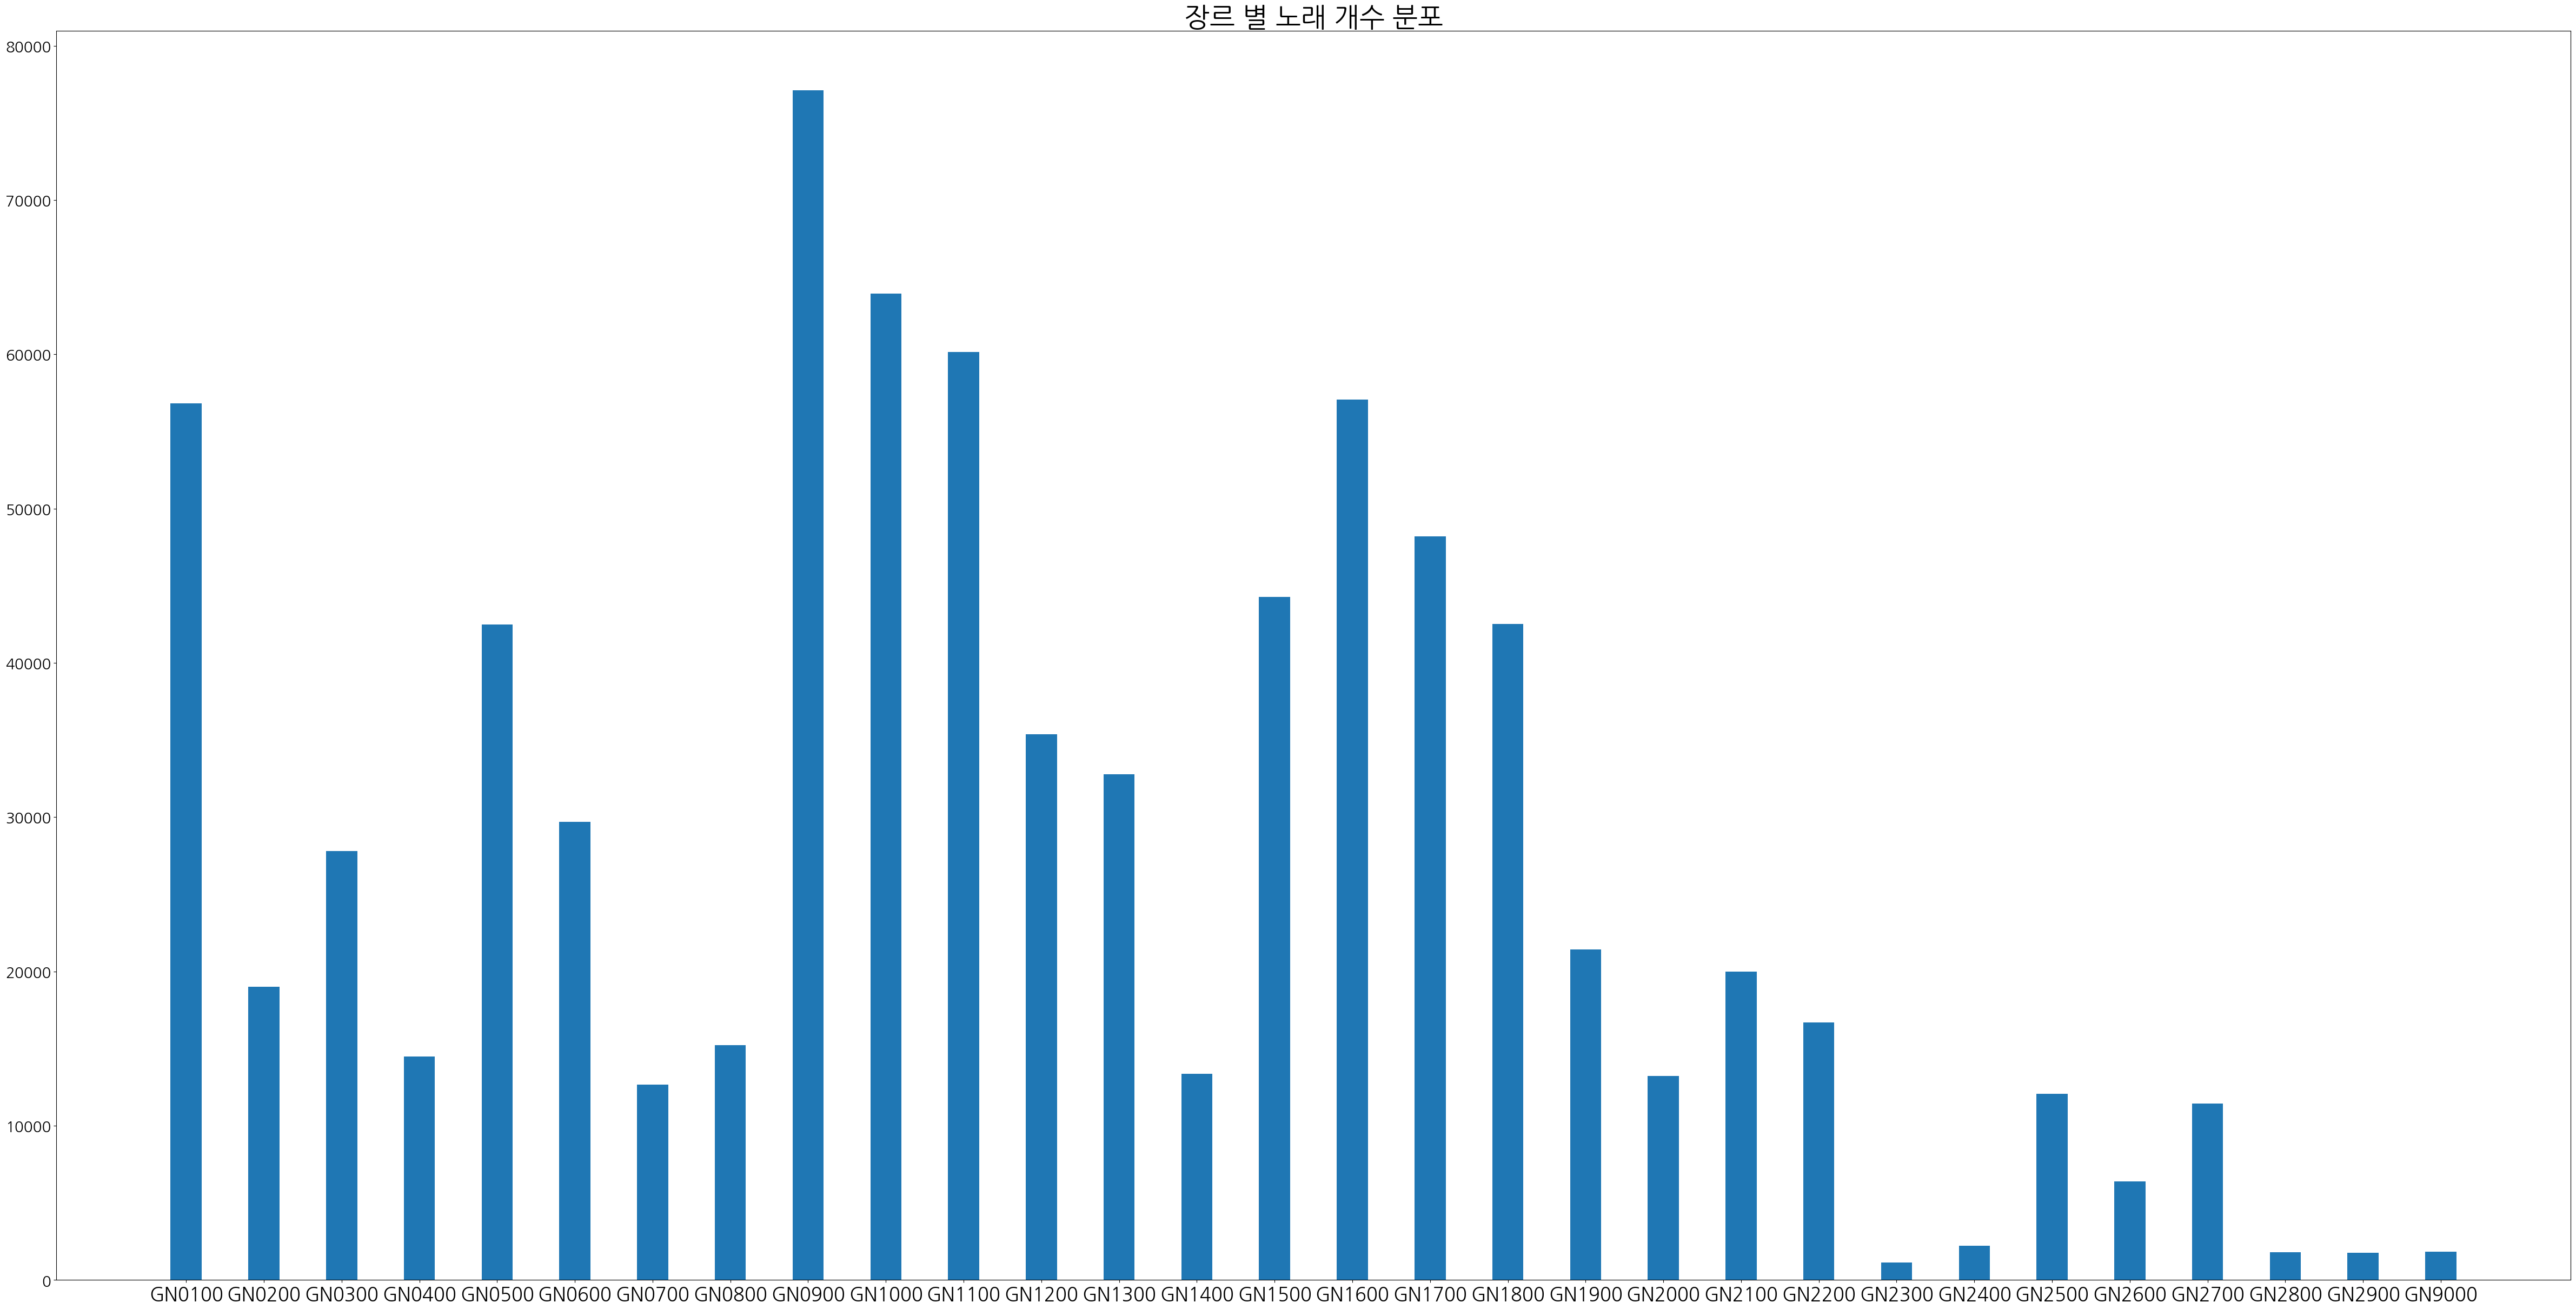

In [127]:
song_gnr = song_meta.explode('song_gn_gnr_basket').groupby('song_gn_gnr_basket')['id'].count().reset_index().rename(columns={'song_gn_gnr_basket':'song_gnr', 'id':'id_cnt'})

plt.figure(figsize=(60, 30))
plt.bar(song_gnr['song_gnr'], song_gnr['id_cnt'], width=0.4)
plt.title('장르 별 노래 개수 분포')
plt.rc('font', size=30)  
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=20) 


In [131]:
gnr_outlier = song_meta.explode('song_gn_gnr_basket')
gnr_outlier[gnr_outlier['song_gn_gnr_basket'] == 'GN9000']

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
262,[],20150318,노년의 건강을 지켜주는 음악 처방전 (부제 : 휴식 때 들으면 좋은 음악친구),2309524,[726909],Bio Sound `Breathing & Big Bell`,GN9000,[차병원],262
916,[],20170825,크리스마스의 기적,10090652,[750416],Springtime In December,GN9000,[Larry Warren],916
1074,[],20131128,Open It Up,10008901,[1221466],Open It Up,GN9000,[Tchengiz],1074
2205,[],20161130,크리스마스 하프 감성 연주곡 베스트,10019367,[923656],고요한 밤 거룩한 밤 (Silent Night Holy Night) (크리스마스 하프),GN9000,[크리스마스 캐롤송],2205
3973,[],20181210,크리스마스 재즈 캐롤 노래 연주곡 캐롤송 메들리,10230803,[2403083],The First Noel (Jazz),GN9000,[크리스마스],3973
...,...,...,...,...,...,...,...,...,...
706172,[],20190924,여행(Travel),10331385,[2739231],여행(Travel),GN9000,[카무 (Kamoo)],706172
706502,[],20110831,엄마와 아가와의 행복한 대화 태교음악 뉴에이지,2009854,[561734],Love Love Love,GN9000,[해피타임뮤직],706502
706716,[],20200109,Have It All,10373946,[2762722],Have It All,GN9000,[Renegade],706716
707201,[],20200115,모두의 MR반주 123,10376105,[770787],Into the Unknown (겨울왕국 2 OST) (Melody MR),GN9000,[모두의MR],707201


=> GN9000 장르를 가진 song 삭제

## 2) Playlists

- 플레이리스트 내 곡들의 평균 발매일
    - 가장 오래된 노래의 발매일, 가장 최신 노래의 발매일, 평균(어떻게할지 잘 모름)

> playlist_title

- 중복된 타이틀 확인

In [137]:
# 1. 플레이리스트 아이디(id)와 플레이리스트 명(plylst_title) 추출
plylst_title = playlists[['id', 'plylst_title']]

# 2. 플레이리스트 이름 별 플레이리스트 ID count 테이블 생성 : plylst_id_cnt
plylst_id_cnt = plylst_title.groupby('plylst_title').id.nunique().reset_index(name = 'mapping_plylst_cnt')

# 3. 플레이리스트 명 중복 구분 : 서로 다른 플레이리스트 아이디로 겹치는 플레이리스트 이름이 없으면 '중복 없음', 그 외 '중복 있음'
plylst_id_cnt = plylst_id_cnt.assign(
    mapping_plylst_cnt_category = pd.cut(plylst_id_cnt['mapping_plylst_cnt'], [0, 1, np.inf], labels = ['중복 없음', '중복 있음'])
)
plylst_id_cnt
# [0, 1, np.inf] : 0이상 1미만 값 = 중복없음, 1이상의 값 = 중복있음

# 4. 중복 구분 별 플레이리스트 수 count 테이블 생성 : plylst_id_cnt_division
plylst_id_cnt_division = pd.DataFrame(plylst_id_cnt.groupby('mapping_plylst_cnt_category').count())
plylst_id_cnt_division


,plylst_title,mapping_plylst_cnt
mapping_plylst_cnt_category,,
중복 없음,108214,108214
중복 있음,2317,2317


=> 전체의 2.09%는 같은 플레이리스트 타이틀을 갖고 있음

- 중복된 타이틀 들의 좋아요, 노래, 태그 개수 비교

In [143]:
plylst_id_cnt.head()

,plylst_title,mapping_plylst_cnt,mapping_plylst_cnt_category
0,[헤어진 날] 꺼내 듣는 노래모음,1,중복 없음
1,○ 여행&드라이브 차안에서 함께들의면 기분좋아지는 리스트 ○,1,중복 없음
2,"# 추억의 댄스 가요(운동, 드라이브)",1,중복 없음
3,#Sleep,1,중복 없음
4,#가을 #비 #밤 #새벽,1,중복 없음


In [151]:
# 플레이리스트 타이틀을 기준으로 merge해 중복된 플레이리스트만 확인
playlists_dup = pd.merge(playlists, plylst_id_cnt, on='plylst_title')
playlists_dup= playlists_dup[playlists_dup['mapping_plylst_cnt_category'] == '중복 있음']
playlists_dup['song_cnt'] = playlists_dup['songs'].apply(len)
playlists_dup['tag_cnt'] = playlists_dup['tags'].apply(len)
playlists_dup.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,mapping_plylst_cnt,mapping_plylst_cnt_category,song_cnt,tag_cnt
16,"[감성, 질리지않는, 나만알고싶은, Pop]",1516,나만 알고싶은 노래들,"[331055, 99287, 310974, 376435, 146989, 430106...",1,2018-01-02 12:10:59.000,4,중복 있음,31,4
17,"[기분전환, 까페]",86179,나만 알고싶은 노래들,"[480142, 578916, 467225, 701072, 197046, 63557...",6,2016-10-06 02:08:40.000,4,중복 있음,46,2
18,"[숨은명곡, 좋은노래]",54673,나만 알고싶은 노래들,"[113618, 422482, 380069, 75425, 79141, 657137,...",7,2016-07-15 10:20:17.000,4,중복 있음,23,2
19,"[감성힙합, 나만알고싶은, 뿜뿜, 그루브, 노래, 감성]",135616,나만 알고싶은 노래들,"[470548, 603591, 382764, 288501, 187291, 37802...",30,2018-07-13 08:18:54.000,4,중복 있음,45,6
46,"[월드, 연주, 재즈]",109678,"영화, Jazz를 만나다 294","[134115, 150481, 2861, 321479, 252928, 360185,...",0,2019-03-27 15:29:18.000,3,중복 있음,27,3


In [164]:
# 같은 타이틀을 가진 플레이리스트의 노래 개수 비교

playlists_dup_song_cnt = playlists_dup.groupby('plylst_title')['song_cnt'].apply(list).reset_index()
playlists_dup_song_cnt['song_cnt_nunique'] = playlists_dup_song_cnt['song_cnt'].apply(lambda x: len(set(x)))
Counter(playlists_dup_song_cnt['song_cnt_nunique'])

Counter({2: 1256,
         1: 514,
         4: 110,
         3: 289,
         19: 2,
         8: 13,
         13: 3,
         16: 2,
         5: 49,
         6: 35,
         7: 18,
         14: 3,
         20: 1,
         15: 3,
         11: 5,
         9: 4,
         10: 6,
         12: 2,
         21: 1,
         18: 1})

In [167]:
# 같은 타이틀을 가진 플레이리스트의 태그 개수 비교

playlists_dup_tag_cnt = playlists_dup.groupby('plylst_title')['tag_cnt'].apply(list).reset_index()
playlists_dup_tag_cnt['tag_cnt_nunique'] = playlists_dup_tag_cnt['tag_cnt'].apply(lambda x: len(set(x)))
Counter(playlists_dup_tag_cnt['tag_cnt_nunique'])

Counter({1: 1180, 2: 952, 3: 121, 4: 44, 6: 8, 5: 12})

In [168]:
# 같은 타이틀을 가진 플레이리스트의 좋아요 비교

playlists_dup_like_cnt = playlists_dup.groupby('plylst_title')['like_cnt'].apply(list).reset_index()
playlists_dup_like_cnt['like_cnt_nunique'] = playlists_dup_like_cnt['like_cnt'].apply(lambda x: len(set(x)))
Counter(playlists_dup_like_cnt['like_cnt_nunique'])

Counter({2: 1482,
         1: 416,
         3: 244,
         4: 76,
         20: 1,
         7: 10,
         8: 6,
         12: 3,
         5: 42,
         6: 21,
         9: 5,
         11: 2,
         10: 5,
         14: 1,
         15: 1,
         13: 1,
         24: 1})

=> 노래 개수 or 좋아요를 많이 가진 플리로 남기자

- 불용어 확인

In [172]:
# 특수문자가 많은 plylst_title을 찾는 함수 정의
def count_special_chars(title):
    count = sum(1 for char in title if char in string.punctuation)
    return count

In [175]:
# 특수문자 개수를 계산하여 새로운 컬럼 추가
playlists['special_char_count'] = playlists['plylst_title'].apply(count_special_chars)

# 특수문자 개수에 따라 데이터프레임 정렬
sorted_df = playlists.sort_values(by='special_char_count', ascending=False)

# 정렬된 데이터프레임 출력
sorted_df[['plylst_title', 'special_char_count']].head(10)

,plylst_title,special_char_count
93770,내가 아팠다고....아파 한다고....하지만 숨길수 밖에 없었던 날....그래......,28
25748,Let`s Rock!!!!!!!!!!!!!!!!!!!!!!!,24
106802,Let`s Rock!!!!!!!!!!!!!!!!!!!!!!!,24
100143,Let`s Rock!!!!!!!!!!!!!!!!!!!!!!!,24
42277,2005~2006 주름 잡았던 히트곡!!!!!!!!!!!!!!!!!!!!!!!,24
77720,나는 솔로다!!!!!!!!!!!!!!!!!!!!!!!,23
5697,반쪽짜리 사랑.....짝사랑.................,22
56134,내적댄스 터져베이베 !!!!! 아이돌 노래노래!!!@!@!!!!!!!!!,20
59162,"가을이다..\(^o^)/ ,곧 겨울이다...((T^T) ;;;;",20
19571,승훈좋아.................,17


=> 특수문자 제거, all 숫자인 타이틀을 가진 플레이리스트 삭제  
=> 불용어를 처리하고 나면 중복되는 내용이 또 있을테니, 불용어부터 처리

> songs

- 플리 별 곡 분포

Text(0.5, 1.0, '플레이리스트 별 노래 갯수 분포')

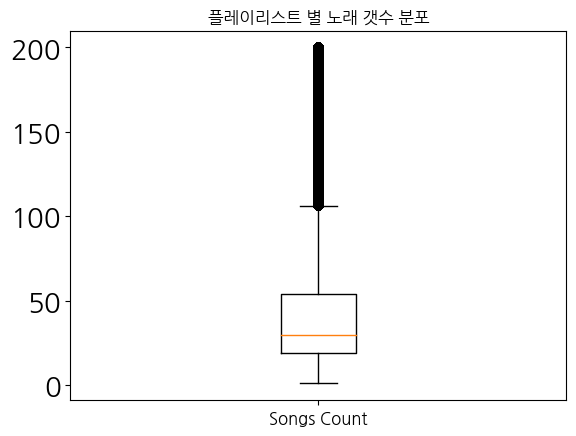

In [189]:
# 플리 별 노래 갯수 분포

playlists['songs_cnt'] = playlists['songs'].apply(len)

boxplot = plt.boxplot(playlists['songs_cnt'])
plt.xticks([1], ['Songs Count'], fontsize=12)
plt.title('플레이리스트 별 노래 갯수 분포')

In [214]:
playlists['songs_cnt'].describe()

count    115071.000000
mean         45.935735
std          43.950335
min           1.000000
25%          19.000000
50%          30.000000
75%          54.000000
max         200.000000
Name: songs_cnt, dtype: float64

In [215]:
q1 = 19
q3 = 54
iqr = q3 - q1

print(q1-(1.5*iqr))
print(q3+(1.5*iqr))

-33.5
106.5


In [200]:
# 박스 플롯의 아웃라이어 값
outlier_points = [flier.get_ydata() for flier in boxplot['fliers']]

# 박스 플롯의 수염(whiskers) 값
whisker_values = [whiskers.get_ydata() for whiskers in boxplot['whiskers']]

# 수염 값 정렬
sorted_outlier_points = [sorted(flier) for flier in outlier_points]

# 결과 출력
print("수염(whiskers) 값:", whisker_values)
print("아웃라이어 값(정렬):", sorted_outlier_points) # 107~200

수염(whiskers) 값: [array([19.,  1.]), array([ 54., 106.])]
아웃라이어 값(정렬): [[107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 108, 108, 108, 108, 108, 108, 108, 108, 108

=> 5~106개만 남겨야 함

- song 별 플리에 사용된 횟수

In [210]:
playlists.explode('songs').groupby('songs').count()['id'].describe()

count    615142.000000
mean          8.592928
std          39.481912
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        2175.000000
Name: id, dtype: float64

=> 50% 미만 빼기

> 태그

In [ ]:
# 불용어 확인

In [ ]:
# 태그 별 플리에 사용된 횟수
# describe

=> 50% 미만 빼기

In [ ]:
# 태그 별 매핑 장르

=> 플레이리스트 수록곡 특징을 탐색해 곡 장르 성격 추정 가능

> like_cnt

In [ ]:
playlists['like_cnt'].describe()

In [ ]:
# 전체 Histogram
plt.hist(playlists['like_cnt'])
plt.show()

=> 좋아요 수의 편차가 심하다.

In [ ]:
# 75%~ Histogram
playlists['like_cnt'].plot.hist(bins=range(2, 29, 1))
plt.show()

In [ ]:
# ~75% Histogram
playlists['like_cnt'].plot.hist(bins=range(30, 53211, 10000))
plt.show()

=> 좋아요 수 25% 이하는 사람들이 사용하는 플레이리스트라고 해석하기 어렵기 때문에 해당 플레이리스트를 삭제한다.

## 결론

In [4]:
# EDA 내용 결과 바탕으로 markdown해둔(전처리 결과 내용)넘버링해서 결론에 정리

1. like_cnt > 5만 남기기

---

- 플레이리스트의 태그와 좋아요, 노래개수의 상관 관계